# MultipleLinearRegression on Energy Dataset

### - What is Multiple Linear Regression?
####  We move from the simple linear regression model with one predictor to the multiple linear regression model with two or more predictors. That is, we use the adjective "simple" to denote that our model has only predictor, and we use the adjective "multiple" to indicate that our model has at least two predictors.

In the multiple regression setting, because of the potentially large number of predictors, it is more efficient to use matrices to define the regression model and the subsequent analyses. This lesson considers some of the more important multiple regression formulas in matrix form. If you're unsure about any of this, it may be a good time to take a look at this Matrix Algebra Review.
The models have similar "LINE" assumptions. The only real difference is that whereas in simple linear regression we think of the distribution of errors at a fixed value of the single predictor, with multiple linear regression we have to think of the distribution of errors at a fixed set of values for all the predictors. All of the model checking procedures we learned earlier are useful in the multiple linear regression framework, although the process becomes more involved since we now have multiple predictors. We'll explore this issue further in Lesson 7.
The use and interpretation of r2 (which we'll denote R2 in the context of multiple linear regression) remains the same. However, with multiple linear regression we can also make use of an "adjusted" R2 value, which is useful for model building purposes. We'll explore this measure further in Lesson 10.
With a minor generalization of the degrees of freedom, we use t-tests and t-intervals for the regression slope coefficients to assess whether a predictor is significantly linearly related to the response, after controlling for the effects of all the opther predictors in the model.
With a minor generalization of the degrees of freedom, we use prediction intervals for predicting an individual response and confidence intervals for estimating the mean response

## without Scaling (Anamolies affecting the results)

In [3]:
import pandas as pd
import urllib
from urllib import request
import numpy as np
import sklearn 
from sklearn import preprocessing
from random import seed
from random import randrange
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures

url = "https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv"
data = pd.read_csv(url)
data['date'] = pd.to_datetime(data['date'])
data['year'], data['month'] , data['time'] , data['hour'] ,data['day'] , data['day_of_week'],data['Numerical_Week'] = data['date'].dt.year, data['date'].dt.month , data['date'].dt.time , data['date'].dt.hour , data['date'].dt.day , data['date'].dt.weekday_name,data['date'].dt.weekday
data['weekStatus'] = data['date'].dt.dayofweek
data['WeekStatus'] = np.where(data['weekStatus'] < 5, 'Weekday', 'Weekend')
d = data.date[0:len(data.date)]
data_final = []
for i in range (len(d)):
    if(i==0):
        a= 61200
        data_final.append(a)
    elif(i>0):
        a=a+600
        data_final.append(a)

data["NSM"] = pd.DataFrame({'NSM':data_final})


data.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,year,month,time,hour,day,day_of_week,Numerical_Week,weekStatus,WeekStatus,NSM
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,2016,1,17:00:00,17,11,Monday,0,0,Weekday,61200
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,2016,1,17:10:00,17,11,Monday,0,0,Weekday,61800
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,2016,1,17:20:00,17,11,Monday,0,0,Weekday,62400
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,2016,1,17:30:00,17,11,Monday,0,0,Weekday,63000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,2016,1,17:40:00,17,11,Monday,0,0,Weekday,63600


In [2]:
data1 = data.set_index('date')
data1 = data1.drop('Appliances', 1)
data1 = data1.drop('day_of_week',1)
data1 = data1.drop('WeekStatus',1)
data1 = data1.drop('time',1)
data1.head(5)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,17,11,0,0,62400
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,17,11,0,0,63000
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,17,11,0,0,63600


predicted_train : [ 126.25686651   56.45412058   65.34078464 ...,  102.36628057   78.8842896
   74.89462171]
predicted_test : [  80.51230653  131.14182412  125.95671458 ...,  155.42381062  162.51941747
  127.08935772]
test_mae : 52.584743828
train_mae : 52.2537647375
test_rmse : 92.9499181677
train_rmse : 93.3821702809
test_r2 : 0.182367332274
train_r2 : 0.168387945454
test_mape : 59.5574311541
train_mape : 60.2707768344
Coefficients: 
 [  2.04577118e+00  -4.71800047e+00   1.47787352e+01  -1.73437460e+01
  -1.34223034e+01   2.92204241e+01   4.11969793e+00  -2.75890214e+00
  -1.52841884e+00   2.09011454e+00   1.02918455e-01   6.93489821e+00
   1.97340696e-01   1.00863588e+00  -1.43823841e+00   6.21361653e+00
  -3.65838196e+00  -1.10216977e+01  -5.56528709e-01  -9.12144159e+00
   7.40759736e-02  -6.78982536e-01   1.59095890e+00   1.23963553e-01
   3.92022244e+00  -3.12472743e-03  -3.12472744e-03   1.13686838e-13
   4.14338453e+02   1.43566301e+00   1.39733423e+01   6.16861540e-01
   6.16

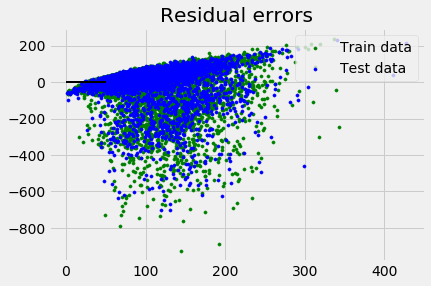

In [3]:
# defining feature matrix(X) and response vector(y)
X = data1
y = data.Appliances
 
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=1)
 
# create linear regression object

reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)


#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



#### Calculating MAPE
def mean_absolute_percentage_error(y_test,x_predict):
    np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.mean(np.abs((y_test - x_predict)/y_test))*100   
test_mape = mean_absolute_percentage_error(y_test, predicted_test)
train_mape = mean_absolute_percentage_error(y_train, predicted_train)
print("test_mape : " + str(test_mape))
print("train_mape : " + str(train_mape))


### Getting coefficients for features 
coefficients=reg.coef_
print('Coefficients: \n', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

### HIT and TRIAL for the Train and Test Division, to get the best results

Division : Train = 80 Test = 20

RMSE : 95.18
R2 : 0.175

Division : Train = 75 Test = 25

RMSE : 94.78
R2 : 0.178

Division : Train = 70 Test = 30

RMSE : 92.94
R2 : 0.18

Division : Train = 65 Test = 35

RMSE : 92.73
R2 : 0.17

#### Division 70, 30 is selected

 ## with Appliances Scaled

In [4]:

data1.head(5)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,17,11,0,0,62400
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,17,11,0,0,63000
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,17,11,0,0,63600


In [5]:
a1 = data.Appliances
a2 = a1.values
a3 = a2.reshape((len(a2), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a3)
data1['appliances_scaler']  = appliances_scaler
data1.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM,appliances_scaler
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,13.275433,13.275433,2016,1,17,11,0,0,61200,0.046729
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,18.606195,18.606195,2016,1,17,11,0,0,61800,0.046729
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,28.642668,28.642668,2016,1,17,11,0,0,62400,0.037383
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,45.410389,45.410389,2016,1,17,11,0,0,63000,0.037383
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,10.084097,10.084097,2016,1,17,11,0,0,63600,0.046729


In [6]:
data2 = data1.drop('appliances_scaler',1)
data2.head(5)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,17,11,0,0,62400
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,17,11,0,0,63000
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,17,11,0,0,63600


predicted_train : [ 0.10865128  0.04341507  0.05172036 ...,  0.08632363  0.06437784
  0.06064918]
predicted_test : [ 0.06589935  0.11321666  0.10837076 ...,  0.1359101   0.14254151
  0.10942931]
test_mae : 0.0491446204004
train_mae : 0.0488352941475
test_rmse : 0.0868690823997
train_rmse : 0.0872730563373
test_r2 : 0.182367332274
train_r2 : 0.168387945454
test_mape : 0.5070267219
train_mape : 0.525781689848
Coefficients: 
 [  1.91193569e-03  -4.40934623e-03   1.38119021e-02  -1.62091084e-02
  -1.25442088e-02   2.73088076e-02   3.85018498e-03  -2.57841321e-03
  -1.42842882e-03   1.95337807e-03   9.61854719e-05   6.48121328e-03
   1.84430557e-04   9.42650358e-04  -1.34414805e-03   5.80711825e-03
  -3.41904856e-03  -1.03006521e-02  -5.20120289e-04  -8.52471177e-03
   6.92298819e-05  -6.34563118e-04   1.48687748e-03   1.15853788e-04
   3.66375929e-03  -2.92030601e-06  -2.92030602e-06   1.94289029e-16
   3.87232199e-01   1.34174113e-03   1.30591984e-02   5.76506113e-04
   5.76506112e-04  -1

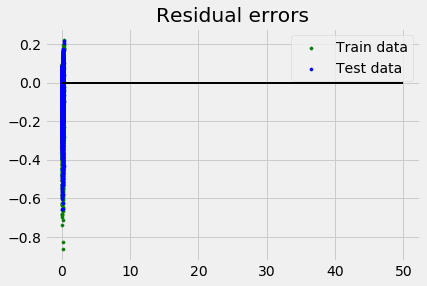

In [7]:
# defining feature matrix(X) and response vector(y)
X = data2
y = data1.appliances_scaler
 
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=1)
 
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)


#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



#### Calculating MAPE
from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


### Getting coefficients for features 
coefficients=reg.coef_
print('Coefficients: \n', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

### Wrong Results : The above model didnt gave us correct result, coz if we scale on the appliances, the effect of the all the features(Unscaled) on the scaled Appliances will definetly give the wrong results. So we move fwd with scaling the whole data using MinMax Method.

## All these trials to make sure Anamolies dont impact our RMSE and R2, which plays a important role in model selection

## with scaling whole data

In [8]:
data1.head(2)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM,appliances_scaler
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,13.275433,13.275433,2016,1,17,11,0,0,61200,0.046729
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,18.606195,18.606195,2016,1,17,11,0,0,61800,0.046729


In [9]:
data2.head(2)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800


predicted_train : [ 0.10865128  0.04341507  0.05172036 ...,  0.08632363  0.06437784
  0.06064918]
predicted_test : [ 0.06589935  0.11321666  0.10837076 ...,  0.1359101   0.14254151
  0.10942931]
test_mae : 0.0491446203993
train_mae : 0.0488352941467
test_rmse : 0.0868690823997
train_rmse : 0.0872730563373
test_r2 : 0.182367332276
train_r2 : 0.168387945454
test_mape : 0.507026722097
train_mape : 0.525781689993
Coefficients: 
 [  1.33835498e-01  -4.17565087e-02   4.23196679e-01  -2.21902694e-01
  -4.28928312e-01   3.28688808e-01   8.14827483e-02  -2.86203867e-02
  -3.34680873e-02   2.04421015e-02   6.35759250e-03   2.21957790e-01
   1.82401821e-02   9.89782877e-03  -3.79049750e-02   6.31104707e-02
  -9.96310751e-02  -9.89892665e-02  -1.25661062e-02  -2.65118536e-01
   2.97688492e-03  -4.82267970e-02   2.08162847e-02   7.53049623e-03
   8.09690803e-02  -1.45989618e-04  -1.45989618e-04   1.66533454e-16
   1.54892880e+00   3.08600459e-02   3.91775951e-01   3.45903668e-03
   3.45903668e-03  

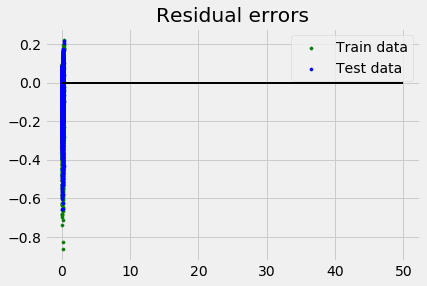

In [10]:


# defining feature matrix(X) and response vector(y)
X = data2
y = data1.appliances_scaler


 
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)
 
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)


#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



#### Calculating MAPE
from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


### Getting coefficients for features 
coefficients=reg.coef_
print('Coefficients: \n', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

## on the already given Training and Testing data with scaling the same data

In [11]:
df_train = pd.read_csv("training.csv")
X_train = df_train.drop("Appliances",1)
y_train = pd.DataFrame(df_train["Appliances"])
df_test = pd.read_csv("testing.csv")
X_test = df_test.drop("Appliances",1)
y_test = pd.DataFrame(df_test["Appliances"])
X_train = X_train.set_index('date')
X_train = X_train.drop('Day_of_week',1)
X_train = X_train.drop('WeekStatus',1)
X_test = X_test.set_index('date')
X_test = X_test.drop('Day_of_week',1)
X_test = X_test.drop('WeekStatus',1)
X_test.head(2)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.59,19.79,45.0,18.89,45.723333,17.166667,...,45.40,6.25,733.8,92.0,6.0,51.5,5.0,45.410389,45.410389,63000
2016-01-11 18:00:00,50,19.89,45.766667,19.2,44.50,19.79,44.9,18.89,45.790000,17.100000,...,45.29,5.90,734.1,92.0,5.0,40.0,4.7,47.233763,47.233763,64800


In [12]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_train = pd.DataFrame(df_train["Appliances"])
a1 = y_train.Appliances
a2 = a1.values
a3 = a2.reshape((len(a2), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a3)
y_train['appliances_scaler']  = appliances_scaler
y_train = y_train.drop("Appliances",1)


y_test = pd.DataFrame(df_test["Appliances"])

a4 = y_test.Appliances
a5 = a4.values
a6 = a5.reshape((len(a5), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a6)
y_test['appliances_scaler']  = appliances_scaler
y_test = y_test.drop("Appliances",1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


predicted_train : [[ 0.14401288]
 [ 0.13065296]
 [ 0.12624516]
 ..., 
 [ 0.10419299]
 [ 0.10894756]
 [ 0.0951012 ]]
predicted_test : [[ 0.139685  ]
 [ 0.15302778]
 [ 0.18827706]
 ..., 
 [ 0.12671824]
 [ 0.1064536 ]
 [ 0.11511047]]
test_mae : 0.0487858103551
train_mae : 0.0497710572831
test_rmse : 0.0882593572328
train_rmse : 0.087449938958
test_r2 : 0.152160994178
train_r2 : 0.171880568467
test_mape : 0.518462191821
train_mape : 0.531378322445
Coefficients: 
 [[ 0.08722454 -0.03668501  0.49170025 -0.22939768 -0.45021696  0.31115898
   0.10693525 -0.02609312 -0.01737809 -0.01462393  0.00569362  0.23692072
   0.03018678  0.01986484 -0.04589256  0.08273054 -0.09932271 -0.11991512
  -0.00734857 -0.29259983  0.00749276 -0.06420187  0.02305517  0.00813421
   0.08660843 -0.00114899 -0.00114899  0.02364026]]
Variance score: 0.15216099417785434


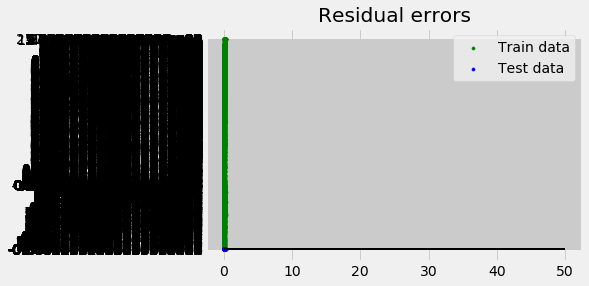

In [13]:

# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)


#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



#### Calculating MAPE
from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


### Getting coefficients for features 
coefficients=reg.coef_
print('Coefficients: \n', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

## # from the above regession we came to know that the rmse / r2 for the spliting we performed is almost same for modeling then what we got from the already given train test split. Hence we decided to move fwd with the train and test already given

# Methods to check overfitting or underfitting of a model

# Regularization and Cross Validation

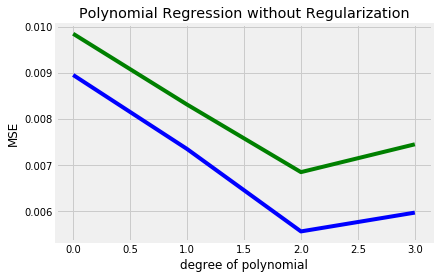

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 4
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

X = data2
y = data1.appliances_scaler
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

train_mse_list = []
test_mse_list = []
degree_of_polynomial = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    # Transfer the X to a polynomial form by using fit_transform
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    lm = linear_model.LinearRegression()
    lm.fit(X_train_, y_train)
    train_pred = lm.predict(X_train_)
    train_mse_list.append(mean_squared_error(y_train, train_pred))
    test_pred = lm.predict(X_test_)
    test_mse_list.append(mean_squared_error(y_test, test_pred))
    degree_of_polynomial.append(i)

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without Regularization')
plt.plot(degree_of_polynomial, train_mse_list, '-b', degree_of_polynomial, test_mse_list, '-g')
plt.show()

# Regularization and Classification

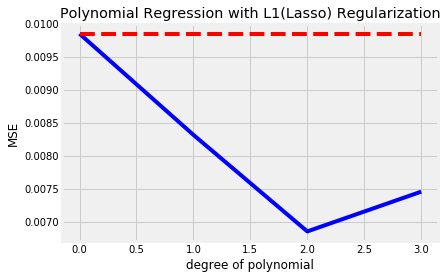

In [15]:
# Use Lasso(L1) regularization to fix overfitting

from sklearn.linear_model import Lasso

# Randomly pick a alpha value for regularization
l1reg = Lasso(alpha=0.005, normalize=True)

l1reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    l1reg.fit(X_train_, y_train)
    test_pred_l1 = l1reg.predict(X_test_)
    l1reg_test_mse_list.append(mean_squared_error(y_test, test_pred_l1))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression with L1(Lasso) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l1reg_test_mse_list, '--r')
plt.show()

In [5]:
# Use Ridge(L2) regularization to fix overfitting
import numpy as np
from sklearn.linear_model import Ridge

X = data2
y = data1.appliances_scaler
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


l2reg = Ridge(alpha=0.005, normalize=True)

l2reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    l2reg.fit(X_train_, y_train)
    test_pred_l2 = l2reg.predict(X_test_)
    l2reg_test_mse_list.append(mean_squared_error(y_test, test_pred_l2))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression with L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l2reg_test_mse_list, '--r')
plt.show()

# Red dash line is the testing error after L2 regularization

NameError: name 'data2' is not defined

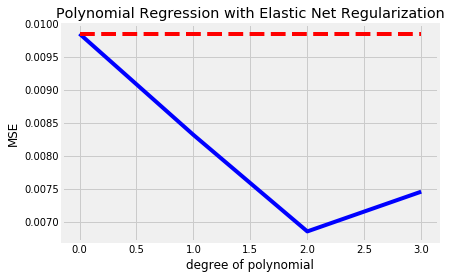

In [17]:
# Use Elastic Net regularization to fix overfitting

from sklearn.linear_model import ElasticNet

enreg = ElasticNet(alpha=0.005, normalize=True)

enreg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    enreg.fit(X_train_, y_train)
    test_pred_en = enreg.predict(X_test_)
    enreg_test_mse_list.append(mean_squared_error(y_test, test_pred_en))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression with Elastic Net Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, enreg_test_mse_list, '--r')
plt.show()
# Red dash line is the testing error after Elastic Net regularization

In [1]:
# Find a better alpha for regularization

from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, X_train, y_train, n_jobs=1, cv=5))
print('The generalization score of linear regression model is %f' % np.mean(lm_score))

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-3, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)

pm_score = np.mean(model_selection.cross_val_score(lm, X_train_, y_train, n_jobs=1, cv=5))
print('The generalization score of quadratic regression model is %f' % np.mean(pm_score))

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.

for alpha in alphas:
    l1reg.alpha = alpha
    this_scores = model_selection.cross_val_score(l1reg, X_train_, y_train, n_jobs=1, cv=5)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(X_train_))
print('The calculated optimal alpha is %f ' % optimal_alpha)
print('The max generalization score of L1 regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos]))

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()

# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.

NameError: name 'np' is not defined

MSE of linear regression model is 0.008364
MSE of quadratic regression model is 0.006858
MSE of optimal L1 regularized quadratic regression model is 0.009851


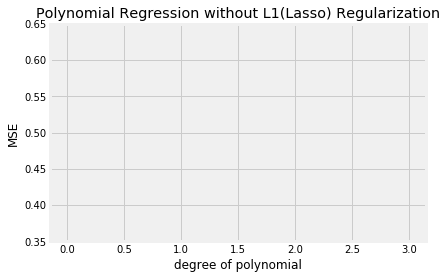

In [49]:
# Set the alpha as the optimal value we got from the last step

optimal_l1reg = Lasso(alpha=0.04, normalize=True)

opt_l1reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    optimal_l1reg.fit(X_train_, y_train)
    test_opt_pred_l1 = optimal_l1reg.predict(X_test_)
    opt_l1reg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_l1))

print('MSE of linear regression model is %f' % test_mse_list[1])
print('MSE of quadratic regression model is %f' % test_mse_list[2])
print('MSE of optimal L1 regularized quadratic regression model is %f' % opt_l1reg_test_mse_list[2])


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.ylim((0.35, 0.65))
plt.grid(True)
plt.title('Polynomial Regression without L1(Lasso) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l1reg_test_mse_list, '--r',
         degree_of_polynomial, opt_l1reg_test_mse_list, '--g')
plt.show()

# Green dash line is the testing error after L1 regularization with optimal alpha. We can see that it is lower
# than the red dash line which using alpha=0.005.

In [51]:
# L1 encourages sparsity

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)
X_test_ = model.fit_transform(X_test)
optimal_l1reg.fit(X_train_, y_train)
lm.fit(X_train_, y_train)

quadratic_features = model.get_feature_names(data1.columns)
total_coef = len(model.get_feature_names(data1.columns))
nz_lm_coef = 0
l1_coef_dict = {}
for i in range(total_coef):
    # if the coefficient is not zero, add 1 to the count.
    if lm.coef_.T[i] != 0.0:
        nz_lm_coef += 1
    if optimal_l1reg.coef_[i] != 0.0:
        l1_coef_dict[quadratic_features[i]] = optimal_l1reg.coef_[i].round(10)

# Let's see how many features could be used in a quadratic model.
print(quadratic_features)

# And let's see how many non-zero coefficients of features (which means the features the model actually uses) 
# in a quadratic model without L1 regularization.
print('Before Lasso regularization, there are %i nonzero coefficients in quadratic regression model.' % nz_lm_coef)

print ('After Lasso regularization, there are only %i nonzero coefficients in quadratic regression model.' % len(l1_coef_dict))
# After L1, the number of features reduce from 77 to 17!
# Here is the features and their coefficients in our final L1 regularized quadratic model.
# You can generate the y-X function using these dict.
l1_coef_dict

['1', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'year', 'month', 'hour', 'day', 'Numerical_Week', 'weekStatus', 'lights^2', 'lights T1', 'lights RH_1', 'lights T2', 'lights RH_2', 'lights T3', 'lights RH_3', 'lights T4', 'lights RH_4', 'lights T5', 'lights RH_5', 'lights T6', 'lights RH_6', 'lights T7', 'lights RH_7', 'lights T8', 'lights RH_8', 'lights T9', 'lights RH_9', 'lights T_out', 'lights Press_mm_hg', 'lights RH_out', 'lights Windspeed', 'lights Visibility', 'lights Tdewpoint', 'lights rv1', 'lights rv2', 'lights year', 'lights month', 'lights hour', 'lights day', 'lights Numerical_Week', 'lights weekStatus', 'T1^2', 'T1 RH_1', 'T1 T2', 'T1 RH_2', 'T1 T3', 'T1 RH_3', 'T1 T4', 'T1 RH_4', 'T1 T5', 'T1 RH_5', 'T1 T6', 'T1 RH_6', 'T1 T7', 'T1 RH_7', 'T1 T8', 'T1 RH_8', 'T1 T9', 'T1 RH_9', 'T1 T_out', '

{}